In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
import re,glob,os
#%matplotlib inline

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'
import dgutils.colors as colortools


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

load data

In [126]:
PhaseDiagramDat = np.loadtxt("../data/phase_diagram.txt", delimiter = ",")

plotting

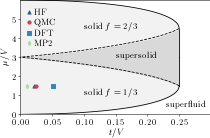

In [3]:
colors = ["#d43e4e", "#abdda4", "#3288bc", "#6a006a"]
cmap = plt.cm.get_cmap('viridis')
colors2 = [cmap(i*0.3) for i in range(4)]

plt.plot(PhaseDiagramDat[:,0], PhaseDiagramDat[:,1], color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], color = 'black', linewidth = 0.8, linestyle = "--")
plt.plot(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,0], -PhaseDiagramDat[:,1]+6, color = 'black', linewidth = 0.8)
plt.plot(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, color = 'black', linewidth = 0.8, linestyle = "--")
plt.plot(PhaseDiagramDat[:,4], -PhaseDiagramDat[:,5]+6, color = 'black', linewidth = 0.8)

ax = plt.gca()
#ax.set_facecolor("#f2f2f2")

plt.fill_between(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], 1.5, color = "#f2f2f2")
plt.fill_between(PhaseDiagramDat[:,2], 1.5, PhaseDiagramDat[:,3], color = "#f2f2f2")

plt.fill_between(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], -PhaseDiagramDat[:,3]+6, color = "#d9d9d9")

plt.fill_between(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, 4.5, color = "#f2f2f2")
plt.fill_between(PhaseDiagramDat[:,4], 4.5, -PhaseDiagramDat[:,5]+6, color = "#f2f2f2")

ax.scatter(0.021, 1.5, color = colors2[1], s = 10, label = "HF", marker = '^')
ax.scatter(0.025, 1.5, color = colors[0], s = 10, label = "QMC")
ax.scatter(0.051, 1.5, color = colors[2], s = 10, label = "DFT", marker = 's')
ax.scatter(0.011, 1.5, color = colors[1], s = 10, label = "MP2", marker = 'd')

plt.legend()

plt.text(0.23,0.4, 'superfluid')
plt.text(0.15,3, 'supersolid')
plt.text(0.1,1.0, r'solid $f = 1/3$')
plt.text(0.1,4.5, r'solid $f = 2/3$')

plt.xlim(0, 0.299)
plt.ylim(0, 5.999)

plt.xlabel(r'$t/V$')
plt.ylabel(r'$\mu/V$')

plt.savefig('../plots/phase_diagram.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
plt.savefig('../plots/phase_diagram.svg', bbox_inches ='tight') 
plt.show()

## Alternate: Combined Results + Phase Diagram

In [149]:
props = {}
props['HF'] = {'mfc':'White', 'mec':colors[0], 'ms':3, 'label':'HF', 'marker':'^', 'mew':0.6,'zorder':-2, 'lw':0}
props['QMC'] = {'mfc':colortools.get_alpha_hex(colors[0],0.8), 'mec':colors[0], 'ms':3, 'label':'QMC', 'marker':'o', 'mew':0.6,'zorder':2, 'lw':0}
props['DFT'] = {'mfc':colortools.get_alpha_hex(colors[2],0.8), 'mec':colors[2], 'ms':3, 'label':'DFT', 'marker':'s', 'mew':0.6,'zorder':-2, 'lw':0}
props['MP2'] = {'mfc':colortools.get_alpha_hex(colors[1],0.8), 'mec':colors[1], 'ms':3, 'label':'MP2', 'marker':'D', 'mew':0.6,'zorder':-2, 'lw':0}

methods = ['HF','QMC','DFT','MP2']

toV = {'HF':0.021, 'QMC':0.025 , 'DFT':0.051, 'MP2':0.011}

In [150]:
colors = ["#d43e4e", "#abdda4", "#3288bc", "#6a006a"]
cmap = plt.cm.get_cmap('viridis')
colors2 = [cmap(i*0.3) for i in range(4)]

fig,ax = plt.subplots()

ax.plot(PhaseDiagramDat[:,0], PhaseDiagramDat[:,1], color = 'black', linewidth = 0.8)
ax.plot(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3], color = 'black', linewidth = 0.8, linestyle = "--")
ax.plot(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], color = 'black', linewidth = 0.8)
ax.plot(PhaseDiagramDat[:,0], -PhaseDiagramDat[:,1]+6, color = 'black', linewidth = 0.8)
ax.plot(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6, color = 'black', linewidth = 0.8, linestyle = "--")
ax.plot(PhaseDiagramDat[:,4], -PhaseDiagramDat[:,5]+6, color = 'black', linewidth = 0.8)

# ax.scatter(0.021, 1.5, edgecolor = colors[0], color='None', s = 12, label = "HF", marker = '^', linewidths=0.6)
# ax.scatter(0.025, 1.5, color = colors[0], s = 10, label = "QMC")
# ax.scatter(0.051, 1.5, color = colors[2], s = 10, label = "DFT", marker = 's')
# ax.scatter(0.011, 1.5, color = colors[1], s = 9, label = "MP2", marker = 'D')

## Plot the raw data as points
for method in methods:
    ax.plot(toV[method],1.5,**props[method])


plt.legend(loc='lower right', markerscale=0.8)


im = plt.imread('../plots/results_table.png',format='png')
newax = fig.add_axes([0.535, 0.52, 0.42, 0.353])
newax.imshow(im,interpolation='none')
newax.axis('off')

im = plt.imread('../plots/graphene_cell.png',format='png')
newax1 = fig.add_axes([0.1425, 0.265, 0.5, 0.19])
newax1.imshow(im,interpolation='none', zorder=-10)
newax1.axis('off')

ax.text(0.2,0.3, 'superfluid', va='center')
ax.text(0.14,3, 'supersolid', va='center')
ax.text(0.01,0.3, r'solid $f = 1/3$')
ax.text(0.01,4.2, r'solid $f = 2/3$')

ax.set_xlim(0, 0.415)
ax.set_ylim(0, 4.5)

ax.set_xlabel(r'$t/V$')
ax.set_ylabel(r'$\mu/V$')

plt.savefig('../plots/phase_diagram_data.pdf', dpi=300, transparent=False, bbox_inches ='tight') 
plt.savefig('../plots/phase_diagram.svg', bbox_inches ='tight') 
plt.show()

## Perform interpolation on the phase boundaries

In [129]:
from scipy import interpolate
C13_super = interpolate.interp1d(PhaseDiagramDat[:,4], PhaseDiagramDat[:,5], kind='cubic', fill_value='extrapolate')
super_C23 = interpolate.interp1d(PhaseDiagramDat[:,4], -PhaseDiagramDat[:,5]+6,kind='cubic', fill_value='extrapolate')
C23_supersolid = interpolate.interp1d(PhaseDiagramDat[:,2], -PhaseDiagramDat[:,3]+6,kind='cubic', fill_value='extrapolate')
supersolid_C13 = interpolate.interp1d(PhaseDiagramDat[:,2], PhaseDiagramDat[:,3],kind='cubic', fill_value='extrapolate')

In [215]:
fig, ax = plt.subplots(1, 1, figsize = figsize, constrained_layout=True) 

tp = np.linspace(0,0.25,1000)

ax.vlines(tp[-1],ymin=supersolid_C13(tp[-1]),ymax=C23_supersolid(tp[-1]), color='k', lw=0.8)
ax.plot(tp,supersolid_C13(tp), color = 'k', linewidth = 0.8, linestyle = "--")
ax.plot(tp, C13_super(tp), color = 'k', linewidth = 0.8)
ax.plot(tp,C23_supersolid(tp), color = 'k', linewidth = 0.8, linestyle = "--")
ax.plot(tp, super_C23(tp), color = 'k', linewidth = 0.8)


# add the line for vacuum (V = 1)
t = np.linspace(0,0.5,100)
μ = -6*t
plt.plot(t,μ, color='k', lw=0.8)
plt.plot(t,-μ+6, color='k', lw=0.8)
ax.set_xlim(0,0.34)
ax.set_ylim(-2.1,6.5)

ax.set_xlabel(r'Hopping    $\;\;t/V$')
ax.set_ylabel(r'Chemical Potential    $\;\;\mu/V$')

ax.text(0.01,-1.4,'vacuum')
ax.text(0.125,1.3,r'solid $f=1/3$',va='center')
ax.text(0.125,3.0,r'supersolid',va='center')
ax.text(0.125,4.7,r'solid $f=2/3$',va='center')
ax.text(0.25,-0.5,'superfluid',va='center')

ax.fill_between(t,-μ+6,y2=μ,color='#B4F8C8', zorder=-20)
ax.fill_between(tp,supersolid_C13(tp),y2=C13_super(tp),color=colortools.get_alpha_hex('#A0E7E5',0.15), zorder=-19)
ax.fill_between(tp,C23_supersolid(tp),y2=supersolid_C13(tp),color='#FFAEBC', zorder=-19)
ax.fill_between(tp,super_C23(tp),y2=C23_supersolid(tp),color=colortools.get_alpha_hex('#A0E7E5',0.5), zorder=-19)
ax.fill_between(tp,np.ones_like(tp)*8,y2=6*tp+6,color=colortools.get_alpha_hex('#A0E7E5',0.85), zorder=-19)

## Plot the raw data as points
for method in methods:
    ax.plot(toV[method],1.5,**props[method])
    
# decide if we want to include depctions of the phases
include_phases = True

if include_phases:
    phases = ['solid', 'superfluid','supersolid']
    
    # properties of the images
    w1,w2,h = 780,750,808
    
    im1 = plt.imread('../plots/graphene_solid.png',format='png')
    newax1 = fig.add_axes([0.12, 0.62, 0.28, 1.2])
    
    # padding here prevents clipping that imshow is doing that I don't know how to 
    # turn off.
    newax1.imshow(np.pad(im1, ((10,0),(0,10),(0,0))),interpolation='none', zorder=-10)
    newax1.axis('off')
    
    im2 = plt.imread('../plots/graphene_superfluid.png',format='png')
    newax2 = fig.add_axes([0.12+0.3, 0.62, 0.28*w2/w1, 1.2])
    newax2.imshow(np.pad(im2, ((10,0),(0,10),(0,0))),interpolation='none', zorder=-10)
    newax2.axis('off')
    
    im3 = plt.imread('../plots/graphene_supersolid.png',format='png')
    newax3 = fig.add_axes([0.12+0.6, 0.62, 0.28*w2/w1, 1.2])
    newax3.imshow(np.pad(im3, ((10,0),(0,10),(0,0))),interpolation='none', zorder=-10)
    newax3.axis('off')
    
    newax1.text(0.5,1.05,r'solid',va='center', ha='center',transform=newax1.transAxes, color='gray', fontsize=7)
    newax2.text(0.5,1.05,r'superfluid',va='center',ha='center', transform=newax2.transAxes, color='gray', fontsize=7)
    newax3.text(0.5,1.05,r'supersolid',va='center',ha='center', transform=newax3.transAxes, color='gray', fontsize=7)

ax.legend(loc='upper right', markerscale=0.8)
plt.savefig('../plots/filled_phase_diagram.pdf', dpi=600, transparent=False,facecolor='w')